#### NN Working Code

IMPLEMENTATION OF THE BACKPROPAGATION ALGORITHM
-----------------------------------------------
Learning rate (alpha) value: 0.3
 
Converged after 8311 epochs with error 0.999928
 
Testing:
Sample number:1
Input: [1. 0. 0. 0. 0. 0. 0. 0.]
Output: [0.938 0.    0.045 0.003 0.    0.    0.    0.035]

Sample number:2
Input: [0. 1. 0. 0. 0. 0. 0. 0.]
Output: [0.    0.925 0.    0.011 0.013 0.049 0.    0.   ]

Sample number:3
Input: [0. 0. 1. 0. 0. 0. 0. 0.]
Output: [0.05  0.    0.92  0.01  0.013 0.    0.    0.   ]

Sample number:4
Input: [0. 0. 0. 1. 0. 0. 0. 0.]
Output: [0.    0.009 0.01  0.978 0.    0.    0.    0.   ]

Sample number:5
Input: [0. 0. 0. 0. 1. 0. 0. 0.]
Output: [0.    0.028 0.027 0.    0.947 0.    0.047 0.   ]

Sample number:6
Input: [0. 0. 0. 0. 0. 1. 0. 0.]
Output: [0.    0.041 0.    0.003 0.    0.936 0.002 0.034]

Sample number:7
Input: [0. 0. 0. 0. 0. 0. 1. 0.]
Output: [0.001 0.    0.    0.    0.025 0.006 0.949 0.014]

Sample number:8
Input: [0. 0. 0. 0. 0. 0. 0. 1.]
Outpu

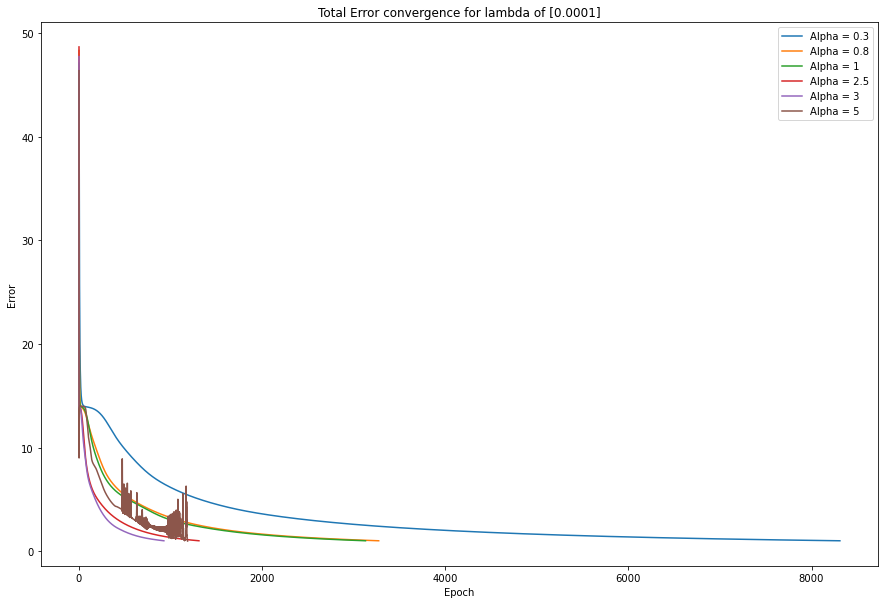

In [1]:
import numpy as np
import pandas as pd
import random
random.seed(123)

# Training examples
X = np.eye(8) # identity matrix

W1 = np.random.rand(9, 3)
W2 = np.random.rand(4, 8)
LAMBDA = [0.0001]
ALPHA = [0.8]

learning_rate = [0.3, 0.8, 1, 2.5, 3, 5]

stored = np.zeros(( len(learning_rate), 3))
errors = [[] for i in learning_rate]

# Activation Function Sigmoid - transfer activation
def sigmoid(output):
    return 1 / (1 + np.exp(-output))

# Derivative of sigmoid function - used for Backpropagation
def d_sigmoid(output):
    return sigmoid(output)*(1 - sigmoid(output))

def forward(x):
    '''
    FORWARD PROPAGATION
    '''
    z2 = np.dot(np.append([1], x), W1) # account for bias in input layer -- tot dimension 9 x 3
    a2 = sigmoid(z2)
    z3 = np.dot(np.append([1], a2), W2) # account for bias in hidden layer -- tot dimension 4 x 8
    output = sigmoid(z3)
    return output

def backpropagation_algo(X):
    samples = X #np.random.permutation(X)
    y = samples
    totalError = 0
    '''
    Iterating though all samples
    '''
    updateW1 = np.zeros((9, 3))
    updateW2 = np.zeros((4, 8))
    for sample in samples:
        '''
        Step 1: FORWARD PROPAGATION
        '''
        a1 = np.append([1], sample).reshape(-1, 1)
        z2 = np.dot(a1.T, W1) # Input to Hidden
        a2 = sigmoid(z2)
        a2 = np.append([1], a2).reshape(-1, 1) # Activation on Hidden
        z3 = np.dot(a2.T, W2)
        yPred = sigmoid(z3)

        '''
        Step 2: BACKPROPAGATION
        '''
        # Error of Output
        delta3 = yPred - sample
        delta2 = np.multiply(np.dot(delta3, W2.T), d_sigmoid(a2.T))

        updateW2 += np.dot(a2, delta3)
        updateW1 += np.dot(a1, delta2[:, 1:])

        totalError += np.sum(np.abs(delta3))
#         totalError += np.sum(delta3)
    return totalError, updateW1, updateW2

print('IMPLEMENTATION OF THE BACKPROPAGATION ALGORITHM')
print('-----------------------------------------------')
for i,value in enumerate(learning_rate):
    print (f'Learning rate (alpha) value: {value}')
    print(' ')
    
    W1 = np.random.rand(9, 3)
    W2 = np.random.rand(4, 8)
    
    ALPHA = value

    converged = False
    epochs = 0
    
    while not converged:
        samples = X #np.random.permutation(X)
        y = samples
        epochs += 1
        '''
        Backpropagation algoritm: 
        '''
        totalError, updateW1, updateW2 = backpropagation_algo(X)
        '''
        WEIGHT UPDATES:
        1. Udate bias weights; 2. Update the weights 
        '''
        m = len(samples)  # number of samples     
        
        # 1
        W2[0] -= ALPHA/m*updateW2[0]
        W1[0] -= ALPHA/m*updateW1[0]
        
        # 2
        W2[1:] -= ALPHA*(updateW2[1:] + LAMBDA*W2[1:])/m
        W1[1:] -= ALPHA*(updateW1[1:] + LAMBDA*W1[1:])/m
        
        # Threshold for convergence (get out of the loop): 
        if totalError <= 1:
            converged = True
        if epochs == 10000:
            converged = True
#             break
#         errors[i].append(np.abs(totalError))
        errors[i].append(totalError)

    print(f'Converged after {epochs} epochs with error {np.around(totalError, 6)}')
    stored[i,1] = epochs
    stored[i,2] = totalError
    print(' ')
    

    print('Testing:')
    counter = 0
    for sample in X:
        counter += 1
        print('Sample number:'+ str(counter))
        print(f'Input: {sample}')
        print(f'Output: {np.around(forward(sample), 3)}')
        print("")
    

    print(f'W1 i.e. Weights from input to hidden layer: \n {np.around(W1, 1)}')
    print(" ")
    print(f'W2 i.e. Weights from hidden to output layer: \n {np.around(W2, 1)}')
    print(" ")
    print('**********************************************************************')

print(f'Weight decay value (lambda): {LAMBDA}')
table = pd.DataFrame(stored, columns = ['Alpha', 'Epochs', 'totError'])
table['Alpha'] = learning_rate
print(table)

import matplotlib.pyplot as plt
print(' ')
print (f'Stored: \n {np.around(stored, 5)}')
# plt.axis([0, 30000, -0.5, 1])
# print(errors)
plt.figure(figsize=(15,10))
for i, e in enumerate(errors):
    plt.plot(e, label=f'Alpha = {learning_rate[i]}')
plt.title(f'Total Error convergence for lambda of {LAMBDA}')
# plt.ylim(0, 1)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

IMPLEMENTATION OF THE BACKPROPAGATION ALGORITHM
-----------------------------------------------
Learning rate (alpha) value: 0.4
 
Converged after 6469 epochs with error 0.999848
 
Testing:
Sample number:1
Input: [1. 0. 0. 0. 0. 0. 0. 0.]
Output: [0.957 0.013 0.    0.    0.004 0.013 0.021 0.   ]

Sample number:2
Input: [0. 1. 0. 0. 0. 0. 0. 0.]
Output: [0.002 0.914 0.04  0.    0.    0.039 0.    0.   ]

Sample number:3
Input: [0. 0. 1. 0. 0. 0. 0. 0.]
Output: [0.    0.057 0.911 0.    0.    0.    0.011 0.018]

Sample number:4
Input: [0. 0. 0. 1. 0. 0. 0. 0.]
Output: [0.    0.    0.    0.924 0.031 0.    0.011 0.02 ]

Sample number:5
Input: [0. 0. 0. 0. 1. 0. 0. 0.]
Output: [0.004 0.    0.    0.028 0.951 0.02  0.    0.002]

Sample number:6
Input: [0. 0. 0. 0. 0. 1. 0. 0.]
Output: [0.008 0.021 0.    0.    0.02  0.942 0.    0.001]

Sample number:7
Input: [0. 0. 0. 0. 0. 0. 1. 0.]
Output: [0.033 0.001 0.028 0.025 0.    0.    0.954 0.   ]

Sample number:8
Input: [0. 0. 0. 0. 0. 0. 0. 1.]
Outpu

<ipython-input-1-9a8fa1688075>:21: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-output))


Converged after 10000 epochs with error 1.504764
 
Testing:
Sample number:1
Input: [1. 0. 0. 0. 0. 0. 0. 0.]
Output: [0.905 0.    0.    0.    0.005 0.007 0.001 0.016]

Sample number:2
Input: [0. 1. 0. 0. 0. 0. 0. 0.]
Output: [0.    0.92  0.013 0.    0.016 0.    0.003 0.   ]

Sample number:3
Input: [0. 0. 1. 0. 0. 0. 0. 0.]
Output: [0.    0.005 0.798 0.076 0.    0.    0.005 0.   ]

Sample number:4
Input: [0. 0. 0. 1. 0. 0. 0. 0.]
Output: [0.    0.    0.023 0.889 0.    0.063 0.    0.153]

Sample number:5
Input: [0. 0. 0. 0. 1. 0. 0. 0.]
Output: [0.034 0.002 0.    0.    0.941 0.    0.    0.136]

Sample number:6
Input: [0. 0. 0. 0. 0. 1. 0. 0.]
Output: [0.006 0.    0.    0.043 0.    0.835 0.005 0.011]

Sample number:7
Input: [0. 0. 0. 0. 0. 0. 1. 0.]
Output: [0.003 0.    0.004 0.    0.    0.021 0.831 0.   ]

Sample number:8
Input: [0. 0. 0. 0. 0. 0. 0. 1.]
Output: [0.001 0.    0.    0.018 0.048 0.001 0.    0.8  ]

W1 i.e. Weights from input to hidden layer: 
 [[-189.8 -120.7 -187.6]
 [ 190

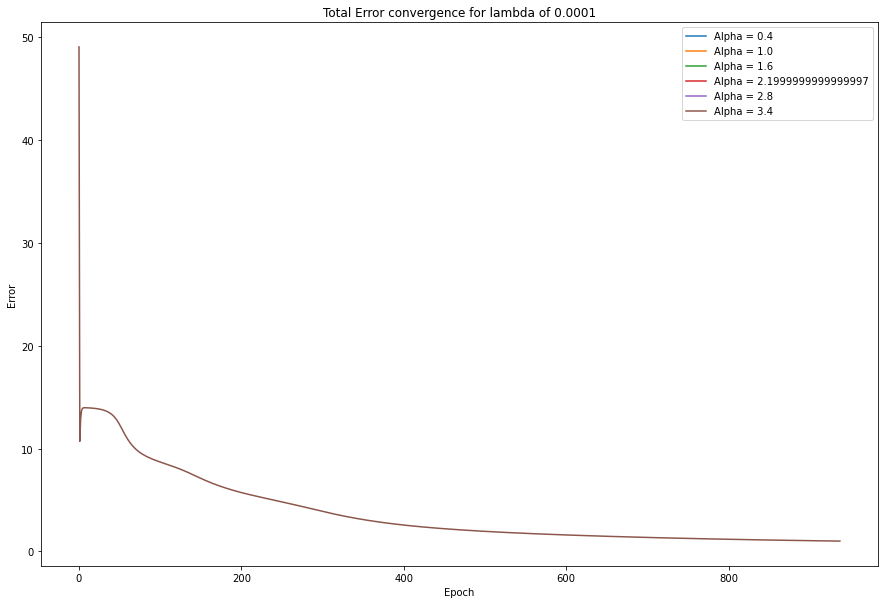

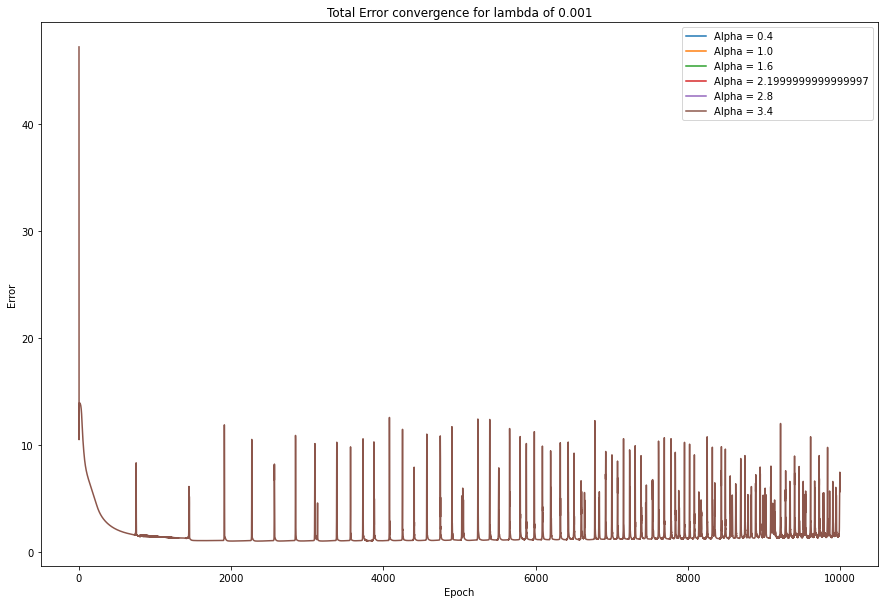

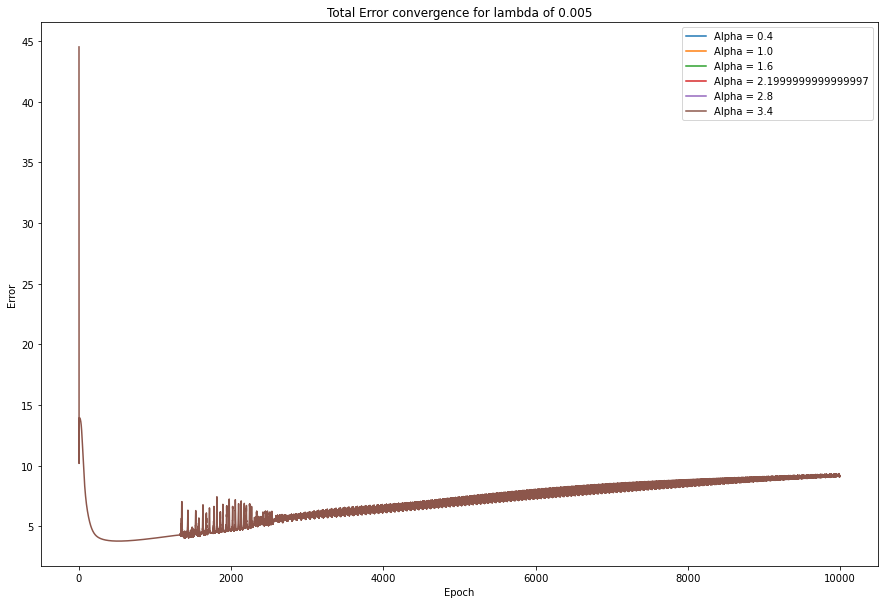

In [2]:
random.seed(123)

# Training examples
X = np.eye(8) # identity matrix

W1 = np.random.rand(9, 3)
W2 = np.random.rand(4, 8)
LAMBDA = [0.0005]
ALPHA = [0.8]
learning_rate = np.arange(0.4, 3.5, 0.6)
stored = np.zeros(( len(learning_rate), 3))

sample_weights = []
all_alphas = []
all_lambdas = []
all_total_erros = []
all_epochs = []
print('IMPLEMENTATION OF THE BACKPROPAGATION ALGORITHM')
print('-----------------------------------------------')
LAMBDAS = [0.0001,0.001, 0.005]

for j in range(len(LAMBDAS)):
    LAMBDA = LAMBDAS[j]

    for i,value in enumerate(learning_rate):
        print (f'Learning rate (alpha) value: {value}')
        print(' ')

        W1 = np.random.rand(9, 3)
        W2 = np.random.rand(4, 8)
        errors = [[] for i in learning_rate]
        ALPHA = value

        converged = False
        epochs = 0

        while not converged:
            samples = X #np.random.permutation(X)
            y = samples
            epochs += 1
            '''
            Backpropagation algoritm: 
            '''
            totalError, updateW1, updateW2 = backpropagation_algo(X)
            '''
            WEIGHT UPDATES:
            1. Udate bias weights; 2. Update the weights 
            '''
            m = len(samples)  # number of samples     

            # 1
            W2[0] -= ALPHA/m*updateW2[0]
            W1[0] -= ALPHA/m*updateW1[0]

            # 2
            W2[1:] -= ALPHA*(updateW2[1:] + LAMBDA*W2[1:])/m
            W1[1:] -= ALPHA*(updateW1[1:] + LAMBDA*W1[1:])/m

            # Threshold for convergence (get out of the loop): 
            if np.abs(totalError) <= 1:
                converged = True
            if epochs == 10000:
    #                 converged = True
                    break
            errors[i].append(totalError)

        print(f'Converged after {epochs} epochs with error {np.around(totalError, 6)}')
        stored[i,1] = epochs
        stored[i,2] = totalError
        print(' ')

        all_alphas.append(ALPHA)
        all_lambdas.append(LAMBDA)
        all_total_erros.append(totalError)
        all_epochs.append(epochs)
        
        print('Testing:')
        counter = 0
        for sample in X:
            counter += 1
            print('Sample number:'+ str(counter))
            print(f'Input: {sample}')
            print(f'Output: {np.around(forward(sample), 3)}')
            print("")


        print(f'W1 i.e. Weights from input to hidden layer: \n {np.around(W1, 1)}')
        print(" ")
        print(f'W2 i.e. Weights from hidden to output layer: \n {np.around(W2, 1)}')
        print(" ")
        print('**********************************************************************')

    print(f'Weight decay value (lambda): {LAMBDA}')
    table = pd.DataFrame(stored, columns = ['Alpha', 'Epochs', 'totError'])
    table['Alpha'] = learning_rate
    print(table)

    import matplotlib.pyplot as plt
    print(' ')
    print (f'Stored: \n {np.around(stored, 5)}')
    # plt.axis([0, 30000, -0.5, 1])
    # print(errors)
    plt.figure(figsize=(15,10))
    for i, e in enumerate(errors):
        plt.plot(e, label=f'Alpha = {learning_rate[i]}')
    plt.title(f'Total Error convergence for lambda of {LAMBDA}')
    # plt.ylim(0, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
#     plt.show()

In [3]:
results = pd.DataFrame()
results['Error'] = all_total_erros
results['Epochs'] = all_epochs
results['Alpha'] = all_alphas
results['Lambda'] = all_lambdas
print(f"The NN with the lowest error is the one that uses a learning rate of {results.sort_values('Error').iloc[0]['Alpha']} and a lambda of {results.sort_values('Error').iloc[0]['Lambda']}")
results

The NN with the lowest error is the one that uses a learning rate of 3.4 and a lambda of 0.0001


,Error,Epochs,Alpha,Lambda
0,0.999848,6469,0.4,0.0001
1,0.999813,2571,1.0,0.0001
2,0.999614,1739,1.6,0.0001
3,0.999769,1954,2.2,0.0001
4,0.999830,1126,2.8,0.0001
5,0.999480,938,3.4,0.0001
6,1.651950,10000,0.4,0.0010
7,1.285999,10000,1.0,0.0010
8,1.209544,10000,1.6,0.0010
9,1.296833,10000,2.2,0.0010
